In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_set=pd.read_csv('ailerons_train.csv')
data_set.head()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [3]:
data_set.isnull().sum() # Checking if there are any empty values in the data set

climbRate       0
Sgz             0
p               0
q               0
curPitch        0
curRoll         0
absRoll         0
diffClb         0
diffRollRate    0
diffDiffClb     0
SeTime1         0
SeTime2         0
SeTime3         0
SeTime4         0
SeTime5         0
SeTime6         0
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     0
diffSeTime2     0
diffSeTime3     0
diffSeTime4     0
diffSeTime5     0
diffSeTime6     0
diffSeTime7     0
diffSeTime8     0
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

<AxesSubplot:>

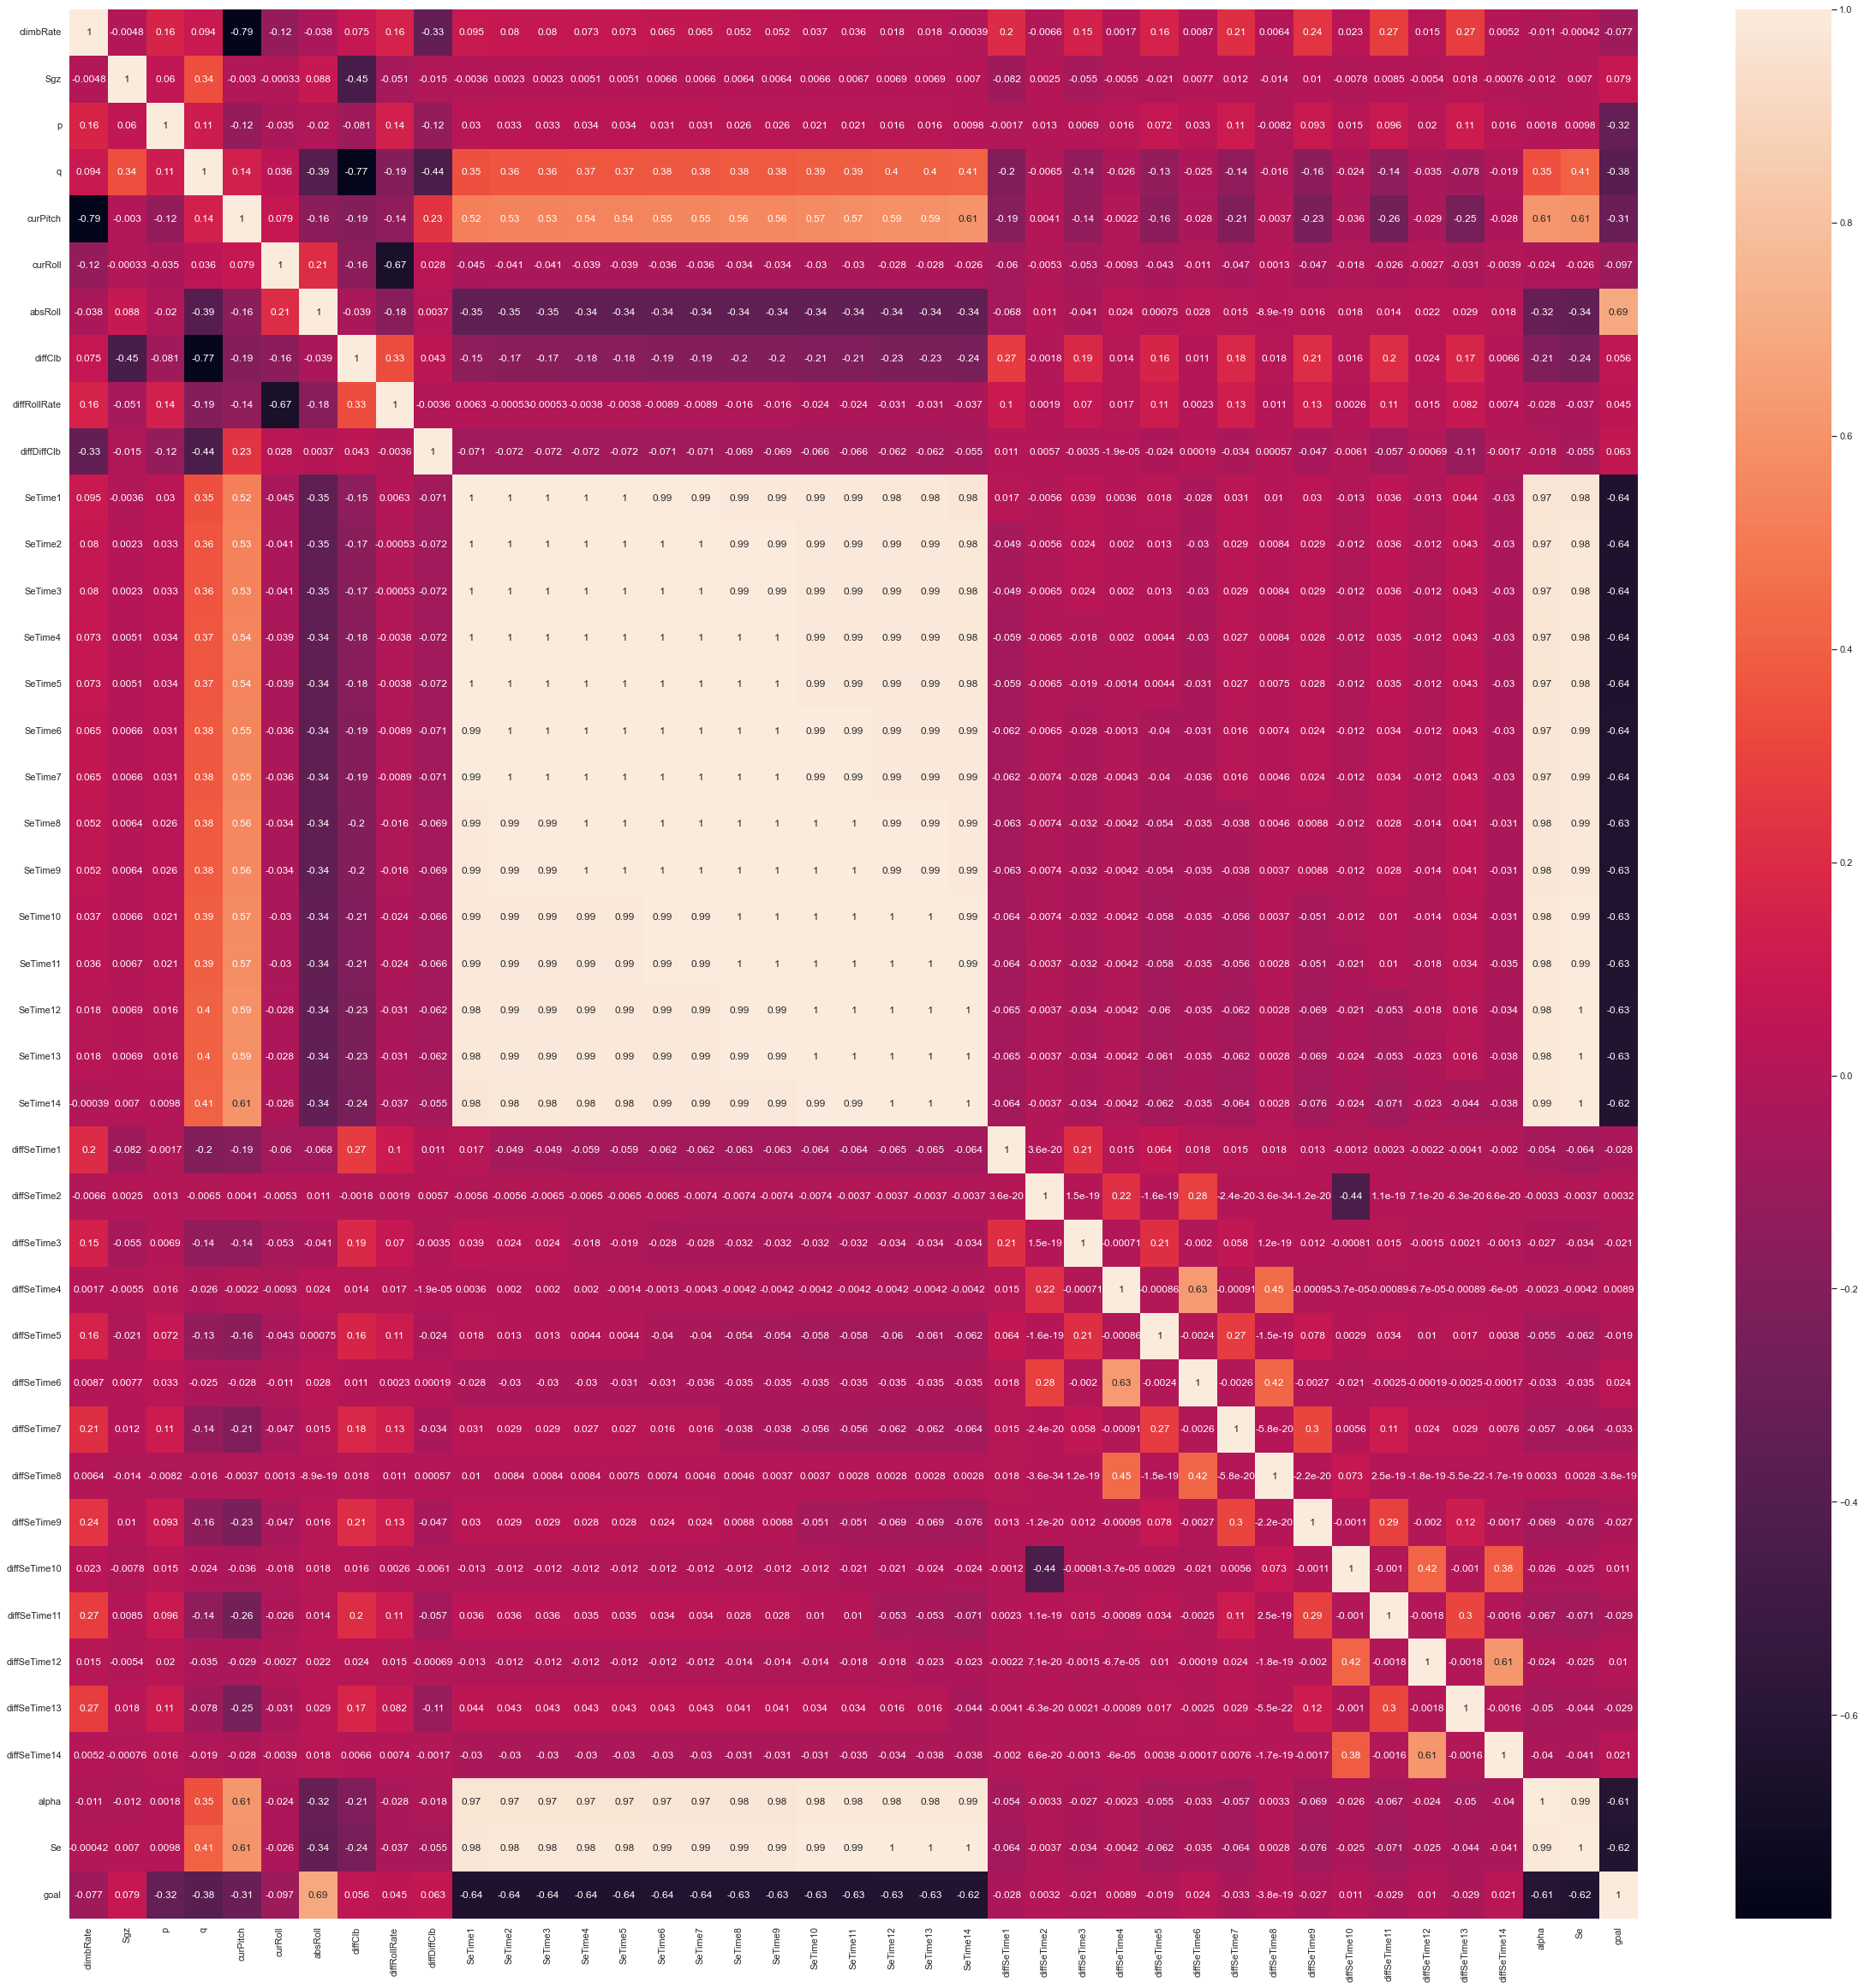

In [4]:
sns.set(rc = {'figure.figsize':(41,41)}) 
sns.heatmap(data_set.corr(),annot=True) # Visualizing correlation of features

In [5]:
data_set.columns

Index(['climbRate', 'Sgz', 'p', 'q', 'curPitch', 'curRoll', 'absRoll',
       'diffClb', 'diffRollRate', 'diffDiffClb', 'SeTime1', 'SeTime2',
       'SeTime3', 'SeTime4', 'SeTime5', 'SeTime6', 'SeTime7', 'SeTime8',
       'SeTime9', 'SeTime10', 'SeTime11', 'SeTime12', 'SeTime13', 'SeTime14',
       'diffSeTime1', 'diffSeTime2', 'diffSeTime3', 'diffSeTime4',
       'diffSeTime5', 'diffSeTime6', 'diffSeTime7', 'diffSeTime8',
       'diffSeTime9', 'diffSeTime10', 'diffSeTime11', 'diffSeTime12',
       'diffSeTime13', 'diffSeTime14', 'alpha', 'Se', 'goal'],
      dtype='object')

In [6]:
X=data_set.drop('goal',axis=1)
y=data_set['goal']

# With Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler=MinMaxScaler()
scaler.fit(X)
s_X=scaler.transform(X)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(s_X,y,test_size=0.20, random_state=42) #Splitting data into train and test sets

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
L_reg=LinearRegression()
L_reg.fit(x_train,y_train)


LinearRegression()

In [11]:
y_pred=L_reg.predict(x_test)


In [12]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
print("RMSE : ", rmse(y_pred,y_test))

RMSE :  0.0001697125810800646


In [13]:
from sklearn.metrics import mean_squared_error
print("mse : ",mean_squared_error(y_pred,y_test))

mse :  2.88023601768575e-08


In [14]:
print(L_reg.score( x_test,y_test))

0.8181129256228893


### RandomForest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
R_reg = RandomForestRegressor(max_depth=10, random_state=10)
R_reg.fit(x_train,y_train)
y_pred=R_reg.predict(x_test)
print("RMSE : ", rmse(y_pred,y_test))
print(R_reg.score(x_test,y_test))

RMSE :  0.00016216544741998667
0.8339302967035542


### LASSO REGRESSOR

In [16]:
from sklearn.linear_model import Lasso
La_reg=Lasso(alpha=0.0001,max_iter=100000)
La_reg.fit(x_train,y_train)
La_y_pred=La_reg.predict(x_test)
print("RMSE : ",rmse(y_pred,y_test))
print(La_reg.score(x_test,y_test))

RMSE :  0.00016216544741998667
-0.0005469042341901265


### ElasticNet

In [17]:
from sklearn.linear_model import ElasticNet
E_reg=ElasticNet(alpha=1.0, l1_ratio=0.5)
E_reg.fit(x_train,y_train)
E_y_pred=E_reg.predict(x_test)
print("RMSE : ",rmse(E_y_pred,y_test))
print(E_reg.score(x_test,y_test))

RMSE :  0.0003980447003878737
-0.0005469042341901265


# Without Normalization

In [18]:
from sklearn.model_selection import train_test_split
n_x_train,n_x_test,n_y_train,n_y_test=train_test_split(X,y,test_size=0.20, random_state=42)  #Splitting data into train and test sets

### Lasso

In [19]:
from sklearn.linear_model import Lasso
La_reg=Lasso(alpha=0.0001,max_iter=1000)
La_reg.fit(n_x_train,n_y_train)
n_y_pred=La_reg.predict(n_x_test)
print("RMSE : ",rmse(n_y_pred,n_y_test))
print(La_reg.score(n_x_test,n_y_test))

RMSE :  0.00028085015065041117
0.5018924978635209


### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
n_L_reg=LinearRegression()
n_L_reg.fit(n_x_train,n_y_train)
n_y_pred=n_L_reg.predict(n_x_test)
print("RMSE : ", rmse(n_y_pred,n_y_test))
print(n_L_reg.score( n_x_test,n_y_test))

RMSE :  0.00016960219722307897
0.818349453372843


### RandomForest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
n_R_reg = RandomForestRegressor( max_depth=10,random_state=10)
n_R_reg.fit(n_x_train,n_y_train)
n_y_pred=n_R_reg.predict(n_x_test)
print("RMSE : ", rmse(n_y_pred,n_y_test))
print(n_R_reg.score(n_x_test,n_y_test))

RMSE :  0.0001621777421069486
0.8339051143672714


# Correlation Feature Selection

In [22]:
x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.20, random_state=42) #Splitting data into train and test sets

In [23]:
cor=x_tr.corr()

In [24]:
def correlation(dataset,threshold):
    col_corr=set() # Set of all names of correlated columns
    corr_matrix=data_set.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i] # names of columns
                col_corr.add(colname)
    return col_corr

In [25]:
corr_features=correlation(x_tr,0.8)
print(corr_features)

{'SeTime2', 'Se', 'SeTime4', 'SeTime13', 'SeTime3', 'SeTime12', 'SeTime8', 'SeTime6', 'SeTime7', 'SeTime11', 'SeTime14', 'alpha', 'SeTime9', 'SeTime5', 'SeTime10'}


In [26]:
new_x_tr=x_tr.drop(corr_features,axis=1)
new_x_te=x_te.drop(corr_features,axis=1)

### Linear Regression

In [27]:
C_L_reg=LinearRegression()
C_L_reg.fit(new_x_tr,y_tr)
C_y_pred=C_L_reg.predict(new_x_te)
print("RMSE : ", rmse(C_y_pred,y_te))
print(C_L_reg.score( new_x_te,y_te))

RMSE :  0.00016946741676183695
0.8186380488832264


### RandomForest Regressor

In [28]:
C_R_reg = RandomForestRegressor( max_depth=10,random_state=10)
C_R_reg.fit(new_x_tr,y_tr)
C_y_pred=C_R_reg.predict(new_x_te)
print("RMSE : ", rmse(C_y_pred,y_te))
print(C_R_reg.score(new_x_te,y_te))

RMSE :  0.0001627168418386737
0.8327990374024079
